In [1]:
from unstructured.partition.pdf import partition_pdf

# output_path = "./content/"
file_path = "/home/hb/Downloads/about-brain-tumors-a-primer-1.pdf"

# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [4]:
for data in chunks:
    print(data.to_dict())
    print("\n\n")
    

{'type': 'CompositeElement', 'element_id': '813fd14c2c2e2f6824bac863d808d660', 'text': '( . American Brain Tumor Association”\n\na primer for patients and caregivers\n\neyelet iB , stg primer for patients and’caregivers\n\nABOUT THE AMERICAN BRAIN TUMOR ASSOCIATION\n\nFounded in 1973, the American Brain Tumor Association (ABTA) was the first national nonprofit organization dedicated solely to brain tumor research. For over 40 years, the ABTA has been providing comprehensive resources that support the complex needs of brain tumor patients and caregivers, as well as the critical funding of research in the pursuit of breakthroughs in brain tumor diagnosis, treatment and care.\n\nTo learn more about the ABTA, visit www.abta.org.\n\nInformation contained in this publication was originally published in two volumes as Brain Tumor Primer: A Comprehensive Introduction to Brain Tumors, 9th Edition; and Living with a Brain Tumor: A Guide for Newly Diagnosed Patients and Their Families. We gratefu

In [6]:
for data in chunks:
    data = data.to_dict()
    data_type = data.get("type","")
    print(data_type)
    # if data_type=="Image":
    #     print(data)
    #     break

CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeElement
CompositeEleme

In [2]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [10]:
chunks[0].metadata.orig_elements

In [12]:
chunks[0].to_dict()

{'type': 'CompositeElement',
 'element_id': '813fd14c2c2e2f6824bac863d808d660',
 'text': '( . American Brain Tumor Association”\n\na primer for patients and caregivers\n\neyelet iB , stg primer for patients and’caregivers\n\nABOUT THE AMERICAN BRAIN TUMOR ASSOCIATION\n\nFounded in 1973, the American Brain Tumor Association (ABTA) was the first national nonprofit organization dedicated solely to brain tumor research. For over 40 years, the ABTA has been providing comprehensive resources that support the complex needs of brain tumor patients and caregivers, as well as the critical funding of research in the pursuit of breakthroughs in brain tumor diagnosis, treatment and care.\n\nTo learn more about the ABTA, visit www.abta.org.\n\nInformation contained in this publication was originally published in two volumes as Brain Tumor Primer: A Comprehensive Introduction to Brain Tumors, 9th Edition; and Living with a Brain Tumor: A Guide for Newly Diagnosed Patients and Their Families. We grate

In [13]:
elements = chunks[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'd58d35fc-1082-48d3-9fe0-d8659c5ee415',
 'text': '( . American Brain Tumor Association”',
 'metadata': {'detection_class_prob': 0.43396350741386414,
  'coordinates': {'points': ((np.float64(300.4904479980469),
     np.float64(82.82401275634766)),
    (np.float64(300.4904479980469), np.float64(356.63409423828125)),
    (np.float64(684.0829467773438), np.float64(356.63409423828125)),
    (np.float64(684.0829467773438), np.float64(82.82401275634766))),
   'system': 'PixelSpace',
   'layout_width': 1400,
   'layout_height': 2100},
  'last_modified': '2025-06-24T11:56:06',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAESAYADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9

In [14]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [15]:
len(images)

57

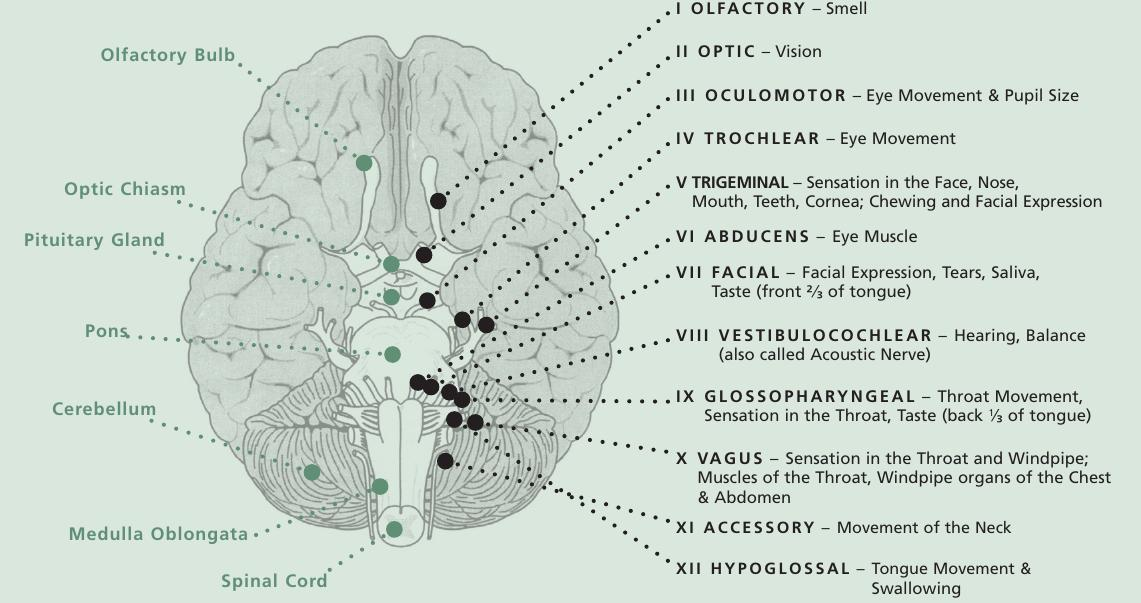

In [21]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[11])